In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import os
import pandas as pd

import datetime
import time
from yahoo_historical import Fetcher



os.chdir(r'C:\Users\hadit\OneDrive - Prophix Software, Inc\AutoTrading')
actual_start = '1-1-2022' # actual start date where data is analyzed
''' 
# load dataset
ticker = 'ETH-CAD'
#dstart = '1-1-2021' #start date of data to calculate rolling averages


dstart = datetime.datetime.strptime(actual_start, '%m-%d-%Y') -datetime.timedelta(days = 14) 
#dstart = datetime.datetime.strptime(actual_start, '%m-%d-%Y')
print(dstart)
dstart = time.mktime(dstart.timetuple())

dend = datetime.datetime.strptime('1-8-2023', '%m-%d-%Y') 
#dstart = datetime.datetime.strptime(actual_start, '%m-%d-%Y')
print(dend)
dend = time.mktime(dend.timetuple())

df = Fetcher(ticker, dstart, dend).get_historical()
#df.Date = pd.to_datetime(df.Date)
#dates = df.Date

'''

C:\Python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Python\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Python\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\hadit\AppData\Roaming\Python\Python310\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


" \n# load dataset\nticker = 'ETH-CAD'\n#dstart = '1-1-2021' #start date of data to calculate rolling averages\n\n\ndstart = datetime.datetime.strptime(actual_start, '%m-%d-%Y') -datetime.timedelta(days = 14) \n#dstart = datetime.datetime.strptime(actual_start, '%m-%d-%Y')\nprint(dstart)\ndstart = time.mktime(dstart.timetuple())\n\ndend = datetime.datetime.strptime('1-8-2023', '%m-%d-%Y') \n#dstart = datetime.datetime.strptime(actual_start, '%m-%d-%Y')\nprint(dend)\ndend = time.mktime(dend.timetuple())\n\ndf = Fetcher(ticker, dstart, dend).get_historical()\n#df.Date = pd.to_datetime(df.Date)\n#dates = df.Date\n\n"

In [2]:
#df.to_csv('df.csv', index=False)
df = pd.read_csv('df.csv')
df.Date = pd.to_datetime(df.Date)
dates = df.Date
dates.min(), dates.max()

(Timestamp('2021-12-18 00:00:00'), Timestamp('2023-01-08 00:00:00'))

In [3]:
df['Close-1'] = df.Close.shift(1)
df['Close-2'] = df.Close.shift(2)
df['Close-3'] = df.Close.shift(3)
df['Close-4'] = df.Close.shift(4)
df['Close-5'] = df.Close.shift(5)
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume,Close-1,Close-2,Close-3,Close-4,Close-5
0,2021-12-18,5003.713379,5150.123535,4867.441406,5107.608398,5107.608398,25185480866,NaN,NaN,NaN,NaN,NaN
1,2021-12-19,5107.624023,5182.140625,5021.904785,5059.893555,5059.893555,20855408682,5107.608398,NaN,NaN,NaN,NaN
2,2021-12-20,5061.316406,5130.514160,4862.750488,5088.990234,5088.990234,27929352213,5059.893555,5107.608398,NaN,NaN,NaN
3,2021-12-21,5094.966309,5247.447266,5065.247070,5195.181152,5195.181152,21178110454,5088.990234,5059.893555,5107.608398,NaN,NaN
4,2021-12-22,5193.159668,5258.674316,5094.604492,5117.877930,5117.877930,17892533424,5195.181152,5088.990234,5059.893555,5107.608398,NaN
5,2021-12-23,5117.700684,5314.621094,4997.907227,5269.454102,5269.454102,23098380211,5117.877930,5195.181152,5088.990234,5059.893555,5107.608398


In [4]:
df.apply(lambda x: x.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Close-1      1
Close-2      2
Close-3      3
Close-4      4
Close-5      5
dtype: int64

C:\Users\hadit\OneDrive - Prophix Software, Inc\AutoTrading\RSI.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'][i+N] = 100-(100/(1+RS))


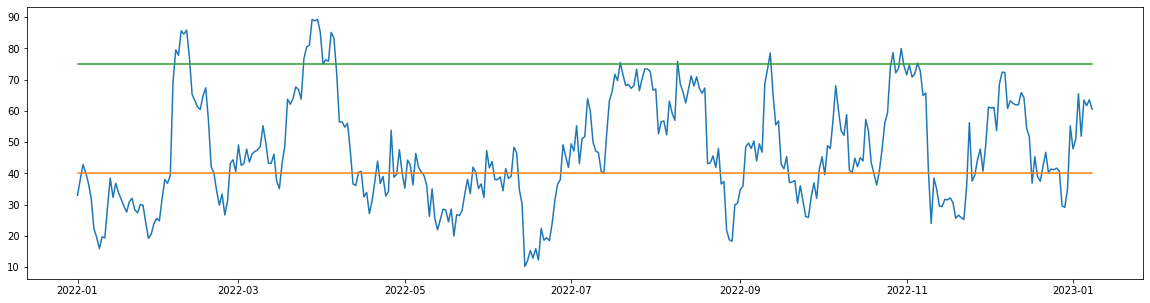

,Date,Open,High,Low,Close,Adj Close,Volume,Close-1,Close-2,Close-3,Close-4,Close-5,RSI
0,2022-01-01,4655.555664,4765.364746,4654.594238,4765.085449,4765.085449,12357594823,4655.032227,4733.961914,4638.504395,4871.414551,5163.349121,33.027283
1,2022-01-02,4764.581543,4842.118652,4711.566406,4848.099121,4848.099121,12509607009,4765.085449,4655.032227,4733.961914,4638.504395,4871.414551,38.134029
2,2022-01-03,4848.062012,4888.744141,4717.070801,4796.455566,4796.455566,15405226757,4848.099121,4765.085449,4655.032227,4733.961914,4638.504395,42.837999
3,2022-01-04,4796.431641,4927.568359,4744.676270,4820.447754,4820.447754,17826656266,4796.455566,4848.099121,4765.085449,4655.032227,4733.961914,40.256282
4,2022-01-05,4820.717773,4883.027344,4409.953125,4530.520996,4530.520996,23047423854,4820.447754,4796.455566,4848.099121,4765.085449,4655.032227,36.795364


In [5]:
from RSI import RSI
df = RSI(df, 40, 75, actual_start)
df.drop('chg', axis=1, inplace=True)
df.head()

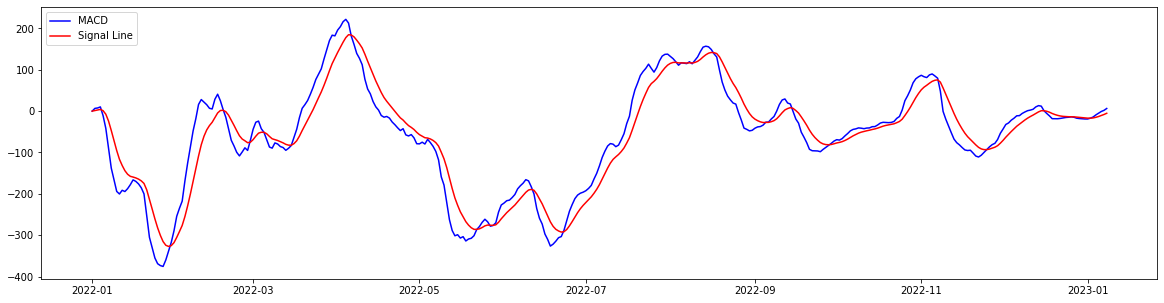

,Date,Open,High,Low,Close,Adj Close,Volume,Close-1,Close-2,Close-3,Close-4,Close-5,RSI,macd
0,2022-01-01,4655.555664,4765.364746,4654.594238,4765.085449,4765.085449,12357594823,4655.032227,4733.961914,4638.504395,4871.414551,5163.349121,33.027283,0.000000
1,2022-01-02,4764.581543,4842.118652,4711.566406,4848.099121,4848.099121,12509607009,4765.085449,4655.032227,4733.961914,4638.504395,4871.414551,38.134029,5.297739
2,2022-01-03,4848.062012,4888.744141,4717.070801,4796.455566,4796.455566,15405226757,4848.099121,4765.085449,4655.032227,4733.961914,4638.504395,42.837999,5.032697
3,2022-01-04,4796.431641,4927.568359,4744.676270,4820.447754,4820.447754,17826656266,4796.455566,4848.099121,4765.085449,4655.032227,4733.961914,40.256282,6.110331
4,2022-01-05,4820.717773,4883.027344,4409.953125,4530.520996,4530.520996,23047423854,4820.447754,4796.455566,4848.099121,4765.085449,4655.032227,36.795364,-12.074462


In [6]:
from macd import macd
df = macd(df)
df.head()

In [7]:
df['close_50'] = df.Close.ewm(span=50,adjust=False).mean()
df['close_12'] = df.Close.ewm(span=12,adjust=False).mean()

In [8]:
df['signal_ema50'] = df.Close>df.close_50
df['signal_ema50'] = df['signal_ema50'].astype(int)
df['signal_ema12'] = df.Close>df.close_12
df['signal_ema12'] = df['signal_ema12'].astype(int)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Close-1,Close-2,Close-3,Close-4,Close-5,RSI,macd,close_50,close_12,signal_ema50,signal_ema12
368,2023-01-04,1660.891968,1707.519165,1657.093994,1694.551758,1694.551758,8636996622,1660.974365,1647.529907,1625.373779,1623.958740,1627.291748,51.883810,5.764754,1691.579140,1652.434794,1,1
369,2023-01-05,1694.495117,1696.957153,1686.806030,1695.988525,1695.988525,5427682997,1694.551758,1660.974365,1647.529907,1625.373779,1623.958740,63.451791,7.940386,1691.752057,1659.135368,1,1
370,2023-01-06,1696.016357,1710.864380,1694.184937,1707.251343,1707.251343,6694156142,1695.988525,1694.551758,1660.974365,1647.529907,1625.373779,61.679105,9.725482,1692.359872,1666.537826,1,1
371,2023-01-07,1707.306030,1708.891235,1697.691528,1700.380371,1700.380371,3450083961,1707.251343,1695.988525,1694.551758,1660.974365,1647.529907,63.536072,9.992797,1692.674402,1671.744371,1,1
372,2023-01-08,1700.261475,1729.761841,1694.942017,1729.761841,1729.761841,4696179702,1700.380371,1707.251343,1695.988525,1694.551758,1660.974365,60.540426,11.585554,1694.128811,1680.670136,1,1


In [9]:
df.apply(lambda x: x.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Close-1         0
Close-2         0
Close-3         0
Close-4         0
Close-5         0
RSI             0
macd            0
close_50        0
close_12        0
signal_ema50    0
signal_ema12    0
dtype: int64

In [10]:
samp = df[df.Date>=pd.to_datetime('2022-9-1')]

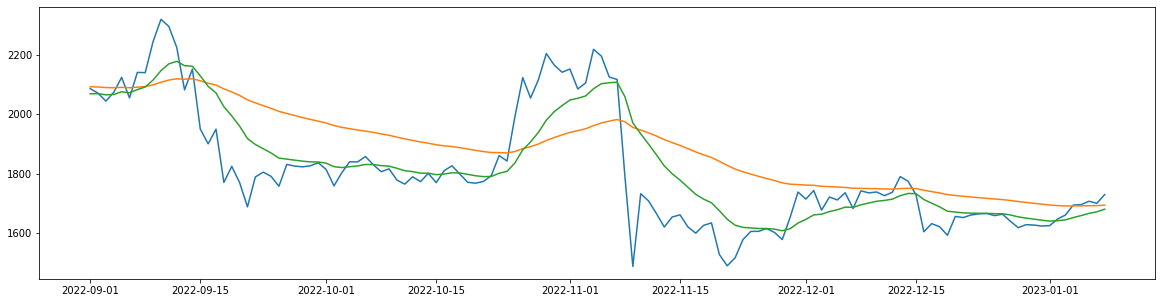

In [11]:
pyplot.figure(figsize=(20,5))
pyplot.plot(samp.Date, samp.Close)
pyplot.plot(samp.Date, samp.close_50)
pyplot.plot(samp.Date, samp.close_12)

In [12]:
y = df.Close.shift(-1) - df.Close
y = y>0
y  = y.astype(int)
df['y'] = y

N = df.shape[1]


In [13]:
df.shape

(373, 19)

In [14]:
df.dropna(inplace=True)
df.shape

(373, 19)

In [15]:
df.drop(['Date','Adj Close'], axis=1, inplace=True)


In [16]:
df.head()

,Open,High,Low,Close,Volume,Close-1,Close-2,Close-3,Close-4,Close-5,RSI,macd,close_50,close_12,signal_ema50,signal_ema12,y
0,4655.555664,4765.364746,4654.594238,4765.085449,12357594823,4655.032227,4733.961914,4638.504395,4871.414551,5163.349121,33.027283,0.000000,4765.085449,4765.085449,0,0,1
1,4764.581543,4842.118652,4711.566406,4848.099121,12509607009,4765.085449,4655.032227,4733.961914,4638.504395,4871.414551,38.134029,5.297739,4768.340887,4777.856783,1,1,0
2,4848.062012,4888.744141,4717.070801,4796.455566,15405226757,4848.099121,4765.085449,4655.032227,4733.961914,4638.504395,42.837999,5.032697,4769.443424,4780.718134,1,1,1
3,4796.431641,4927.568359,4744.676270,4820.447754,17826656266,4796.455566,4848.099121,4765.085449,4655.032227,4733.961914,40.256282,6.110331,4771.443593,4786.830384,1,1,0
4,4820.717773,4883.027344,4409.953125,4530.520996,23047423854,4820.447754,4796.455566,4848.099121,4765.085449,4655.032227,36.795364,-12.074462,4761.995648,4747.398170,0,0,0


In [17]:
# split into train and test sets
values = df.values
#n_train_hours = 365 * 24
train = values[:round(0.8*values.shape[0]), :]
test = values[round(0.8*values.shape[0]):, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]


print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(298, 16) (298,) (75, 16) (75,)


# Feature selection

<AxesSubplot: >

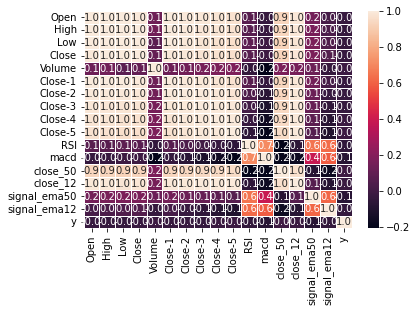

In [18]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f')

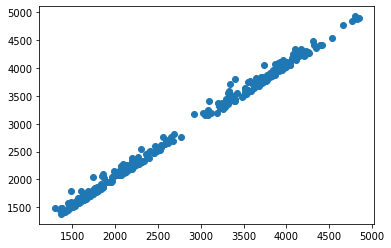

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df.Open, df.High)

## PCA

### logistic regression

base model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
acc_base_logreg = accuracy_score(test_y, y_pred)
acc_base_logreg

0.49333333333333335

In [21]:
n_ft = 9

with PCA

In [22]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define the pipeline
steps = [('pca', PCA(n_components=n_ft)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(model, train_X, train_y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
accuracy_score(test_y, y_pred)


0.48

with LLE

In [23]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=n_ft)) , ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(model, train_X, train_y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
accuracy_score(test_y, y_pred)

0.56

### RAndom forest

base model

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=0)
rf.fit(train_X, train_y)
y_pred = rf.predict(test_X)
acc_base_logreg = accuracy_score(test_y, y_pred)
acc_base_logreg

0.52

with PCA

In [25]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define the pipeline
steps = [('pca', PCA(n_components=n_ft)), ('m', rf)]
model = Pipeline(steps=steps)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
accuracy_score(test_y, y_pred)

0.5066666666666667

with LLE

In [26]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define the pipeline
steps = [('pca', LocallyLinearEmbedding(n_components=n_ft)), ('m', rf)]
model = Pipeline(steps=steps)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
accuracy_score(test_y, y_pred)

0.44

### XGBoost

base model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(train_X, train_y)
y_pred = xgb_model.predict(test_X)
acc_base_logreg = accuracy_score(test_y, y_pred)
acc_base_logreg

0.52

with PCA

In [28]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define the pipeline
steps = [('pca', PCA(n_components=n_ft)), ('m', xgb_model)]
model = Pipeline(steps=steps)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
accuracy_score(test_y, y_pred)

0.4666666666666667

In [29]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=n_ft)), ('m', xgb_model)]
model = Pipeline(steps=steps)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
accuracy_score(test_y, y_pred)

0.4266666666666667

390.0